# Create Neural Network for Image Inversion with numpy

## I. Read training data

In [3]:
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [4]:
# Convert PIL image to array normalised to 0 to 1 rage.
max_color = 255
def image_2_array(filename):
    pil_img=Image.open(filename)
    pil_arr=np.array(pil_img)
    pil_scaled_arr = (pil_arr / max_color)
    return pil_img, pil_scaled_arr

# Invert grayscale PIL image
def invert_array(arr):
    inverted_arr = 1 - arr
    return inverted_arr
    
# Convert normalized array to PIL image
def array_2_image(arr):
    arr_scaled = (arr) * max_color
    im = Image.fromarray(arr_scaled)
    return im

In [42]:
# Read training images into array of shape (m_samples, imsize, imsize, 1)
train_data_onedimension = np.array([])
train_labl_onedimension = np.array([])
DIR="imgset20x20x1000"
imsize=20
orig_pattern = DIR + "/origin*"
invr_pattern = DIR + "/inverse*"
import glob
for f in glob.glob(orig_pattern):
    print f
    img,a = image_2_array(f)
    s = np.sum(a)
    print s
    train_data_onedimension = np.append(train_data_onedimension,a)
for f in glob.glob(invr_pattern):
    img,a = image_2_array(f)
    train_labl_onedimension = np.append(train_labl_onedimension,a)

print train_data_onedimension.shape
print train_labl_onedimension.shape

imgset20x20x1000/origin_000001.gif
0
imgset20x20x1000/origin_000002.gif
0
imgset20x20x1000/origin_000003.gif
0
imgset20x20x1000/origin_000004.gif
0
imgset20x20x1000/origin_000005.gif
0
imgset20x20x1000/origin_000006.gif
0
imgset20x20x1000/origin_000007.gif
0
imgset20x20x1000/origin_000008.gif
0
imgset20x20x1000/origin_000009.gif
0
imgset20x20x1000/origin_000010.gif
0
imgset20x20x1000/origin_000011.gif
0
imgset20x20x1000/origin_000012.gif
0
imgset20x20x1000/origin_000013.gif
0
imgset20x20x1000/origin_000014.gif
0
imgset20x20x1000/origin_000015.gif
0
imgset20x20x1000/origin_000016.gif
0
imgset20x20x1000/origin_000017.gif
0
imgset20x20x1000/origin_000018.gif
0
imgset20x20x1000/origin_000019.gif
0
imgset20x20x1000/origin_000020.gif
0
imgset20x20x1000/origin_000021.gif
0
imgset20x20x1000/origin_000022.gif
0
imgset20x20x1000/origin_000023.gif
0
imgset20x20x1000/origin_000024.gif
0
imgset20x20x1000/origin_000025.gif
0
imgset20x20x1000/origin_000026.gif
0
imgset20x20x1000/origin_000027.gif
0
i

In [40]:
m_samples = train_data_onedimension.shape[0] / imsize / imsize
train_data = train_data_onedimension.reshape(m_samples, imsize, imsize, 1)
train_labl = train_labl_onedimension.reshape(m_samples, imsize, imsize, 1)
print train_data[:2]
print train_labl.shape


[[[[ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]


In [23]:
# Split data between training and test sets 700 : 300
TEST_SIZE = 300
TRAINING_SIZE = m_samples - TEST_SIZE

test_data  = train_data[:TEST_SIZE,:,:,:]
train_data = train_data[TEST_SIZE:,:,:,:]

test_labl  = train_labl[:TEST_SIZE,:,:,:]
train_labl = train_labl[TEST_SIZE:,:,:,:]
print("Dataset dimensions:")
print train_data.shape
print train_labl.shape
print test_data.shape
print test_labl.shape
diff_matr = train_data[1]-train_labl[1]
print diff_matr[:2,:2,:]

x = np.array(train_data.reshape(train_data.shape[0],imsize*imsize))
y = np.array(train_labl.reshape(train_labl.shape[0],imsize*imsize))

Dataset dimensions:
(100, 20, 20, 1)
(100, 20, 20, 1)
(300, 20, 20, 1)
(300, 20, 20, 1)
[[[ 0.]
  [ 0.]]

 [[ 0.]
  [ 0.]]]


In [29]:
class NN(object):
    def __init__(self):
        self.inputSize = imsize*imsize
        self.outputSize = imsize*imsize
        
        self.W1 = np.random.random((self.inputSize, self.outputSize))
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.h = self.sigmoid(self.z2)
        return self.h
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

(100, 400)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

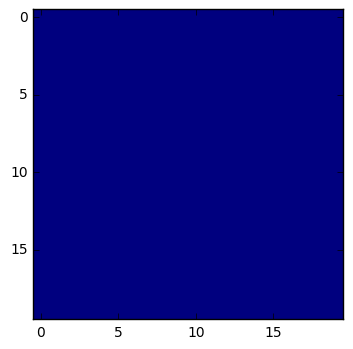

In [39]:
nn = NN()
print x.shape
h = nn.forward(x)
img_x= x[1].reshape(imsize,imsize)
img_h= h[0].reshape(imsize,imsize)
print img_x
plt.imshow(img)

## II. Initialise weights

In [8]:
# layer sizes
s = np.array([imsize*imsize, imsize*imsize])
W = np.random.random((s[0], s[1]))

In [9]:
print W.shape
print W

(400, 400)
[[ 0.2132394   0.51641351  0.91752911 ...,  0.84636747  0.82587625
   0.45454458]
 [ 0.35840594  0.84561957  0.74822439 ...,  0.34201689  0.9444326
   0.18016054]
 [ 0.28366887  0.8278905   0.86779949 ...,  0.40127049  0.65035683
   0.71638088]
 ..., 
 [ 0.79437046  0.63978689  0.30769708 ...,  0.05219048  0.62763531
   0.04282287]
 [ 0.90188834  0.25330249  0.26978579 ...,  0.26665048  0.33400786
   0.39849661]
 [ 0.61729781  0.06111722  0.81407881 ...,  0.75549709  0.01583687
   0.3165882 ]]


## III. Cost function and hypothesis

$J = \frac{1}{2} \sum\limits_{i=1}^{imsize*imsize} (h_{i} - y_{i})^2 $

$h = g(Wx)$

In [10]:
def loss(h, y):
    J = sum((h - y)*(h - y)) / 2
    return J

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoidPrime(z):
    # Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

def hypothesis(x, W):
    y = sigmoid(np.dot(x, W))
    return y

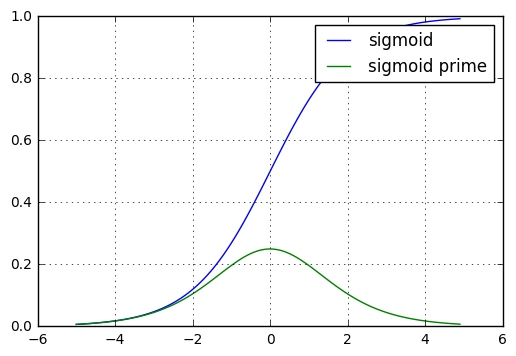

In [15]:
test_v = np.arange(-5,5,0.1)
plt.plot(test_v, sigmoid(test_v))
plt.plot(test_v, sigmoidPrime(test_v))
plt.grid(1)
plt.legend(["sigmoid","sigmoid prime"])

## IV. Training

In [65]:
iterations = 1

print x.shape
Dlt = np.zeros(s[0],s[1])
for iter in xrange(iterations):
    # Forward propagation
    h = hypothesis(x, W)
    J = loss(h, y)
    print J
    # Backward propagation
    print "delta"
    l1_delta = y - h
    l0_delta = np.dot(l1_delta,W)* h * (1 - h)
    print l1_delta.shape
    print l0_delta.shape
    #Dlt = 
    # Update weights
    #W = W + 

(700, 400)
50.0038159489
delta
(700, 400)
(700, 400)


In [18]:
# Test array operations
a = np.array([[ 1., 2.], [2., 3.]])
b = np.array([[ 2., 2.], [2., 2.]])

In [45]:
print(a*b)
print ".."
print(a*a)
print(sum(a*a))
print"-----"
print(sum((b - a)*(b - a)))

[[ 2.  4.]
 [ 4.  6.]]
..
[[ 1.  4.]
 [ 4.  9.]]
[  5.  13.]
-----
[ 1.  1.]
